<a href="https://colab.research.google.com/github/s-c-soma/Deeplearning-CMPE-258/blob/main/Assignment_3/Assignment_3_Part_B_3_Pytorch(with_linear_modules).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Layer Neural Network (with relu nonlinearity) Using Pytorch(with linear modules)
-high level primitives

# Implementation Details and Discussion

* Here, I have generated the 3d input and 2d output data first.
* Then I have built a 3 layer neural network with ReLU non linearity using Pytorch Auto Differenciation
* Used Pytorch high level primitives
* Here the output has 2 neurons

## Steps: 
I have listed down the the formula and steps I have followed in each section:
- Initialized the parameters for a three-layer network 
- Used Pytorch Auto Differentiation
- Defined the 3layer architechture 
- Then training including back propagation
- Finally updated the parameters.
- Validation is also done
- After 2000 epochs, loss is 0.22410660982131958

## Equation of Multi Layer:
$$ Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} $$

$$ A^{[l]} = g^{[l]}(Z^{[l]}) $$

Where $l$ is the `lth` layer.

## ExtraCredit:
* At the bottom I have plotted the data in 3d space. 
* To plot 3 dimensional data, I have reduced x into 2-d using TSNE

# Check if GPU/TPU available

In [3]:
!nvidia-smi

Mon Mar 22 00:26:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Colab environment

In [4]:
!python --version

Python 3.7.10


In [5]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [6]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


# Library

In [7]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from typing import Callable
from sklearn.manifold import TSNE
import pdb

# Generating Data: 3D Input :: 2D Output

In [8]:
# Make non-linear data, using 3 dimensional input data and 2 output neurons

n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1, 4],[2, 1, 2]]).T
bias_true = np.array([0.5, 0.25])

# f(x) =  y = 5x + b
# f(x) = y = x^2w + b 

# y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_true, label='underlying function')
  if y_true is not None:
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_true, label='our function')
  plt.legend()

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


In [9]:
# Generating data of 3 dim input and 2 dim output
n, d = 500, 3
x = torch.FloatTensor(n, d).uniform_(-1, 1)
weights_true = torch.tensor([[5,1,5],[1,2,1]]).float()
weights_true = torch.transpose(weights_true,0,1)
bias_true = torch.tensor([1,2])
#using torch
y_true = torch.mm(x**2,weights_true) + torch.mm(x,weights_true) + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: torch.Size([500, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([500, 2])


# Building Multi Layer NN using auto differentiation: 3 Layer


In [10]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 12)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(12, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

# Model Training and Validation 

In [11]:
# Training
def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad() # Initialize gradient as zero
    y_pred_tensor = model(x) # Forward Pass
    loss_value = loss(y_pred_tensor, y) # Compute loss with MSE
    if epoch % 20 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward() # Use autogradient to compute backward pass
    optimizer.step() # Update weights 
  #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
    
loss = nn.MSELoss()
model = TorchModel(d, 25) #(input_dim, num_hidden)
y_pred = model(x)
torch_fit(x, y_true, model=model, loss=loss, lr=0.0035, num_epochs=2000)

Epoch 0, loss 25.960752487182617
Epoch 20, loss 23.12171173095703
Epoch 40, loss 20.22205924987793
Epoch 60, loss 16.6350154876709
Epoch 80, loss 12.670075416564941
Epoch 100, loss 9.804140090942383
Epoch 120, loss 8.024410247802734
Epoch 140, loss 6.553433418273926
Epoch 160, loss 5.2811713218688965
Epoch 180, loss 4.276747703552246
Epoch 200, loss 3.56534743309021
Epoch 220, loss 3.094954013824463
Epoch 240, loss 2.7868857383728027
Epoch 260, loss 2.5661675930023193
Epoch 280, loss 2.401273727416992
Epoch 300, loss 2.270195484161377
Epoch 320, loss 2.1571033000946045
Epoch 340, loss 2.0568480491638184
Epoch 360, loss 1.9647271633148193
Epoch 380, loss 1.8784078359603882
Epoch 400, loss 1.796485185623169
Epoch 420, loss 1.7182081937789917
Epoch 440, loss 1.6426801681518555
Epoch 460, loss 1.5699883699417114
Epoch 480, loss 1.500054955482483
Epoch 500, loss 1.4332644939422607
Epoch 520, loss 1.3695036172866821
Epoch 540, loss 1.3076564073562622
Epoch 560, loss 1.2479238510131836
Epoch 

# Visualization: Training Data and Prediction

## Plot:: Comparison True vs Predicted Value

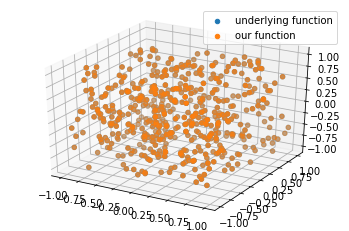

In [12]:
plot_3d(x, y_true, y_pred)

Text(0.5, 1.0, 'Plot:: Comparison True vs Predicted Value')

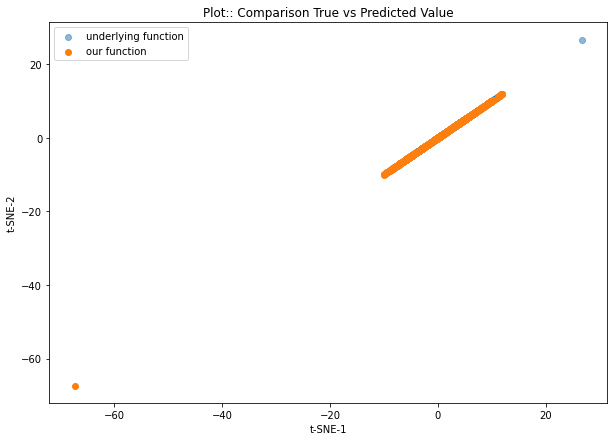

In [13]:
import numpy as np
from sklearn.manifold import TSNE

view = TSNE(n_components=3, perplexity=10,learning_rate=200,random_state=123).fit_transform(x, y_pred)

def plot_tsne(x, y_true, y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(view[:,0], view[:,0], alpha=0.5, label='underlying function')
  if y_true is not None:
    plt.scatter(view[:, 1], view[:, 1], label='our function')
  plt.xlabel('t-SNE-1')
  plt.ylabel('t-SNE-2')
  # plt.plot(x, y_true[:,0], y_true[:,0], color='blue', alpha=0.5, label='True Value')
  plt.legend()

plot_tsne(x, y_true, y_pred)
plt.title("Plot:: Comparison True vs Predicted Value")

## ExtraCredit: t-SNE 3D Plot

In [14]:
def plot_intereactive_3d(x, y, y_pred=None):
  import plotly.graph_objects as go

  fig = go.Figure()
  fig.add_trace(go.Scatter3d(x = x[:,0],
                    y = x[:,1],
                    z = y.reshape([-1]),
                    opacity=0.5, mode='markers', name='Underlying Function'
                    ))
 
  if y_pred is not None:
    fig.add_trace(go.Scatter3d(x = x[:,0],
                   y = x[:,1],
                   z = y_pred.reshape([-1]),
                   opacity=0.5, mode='markers', name='Predicted Function'
                  ))
    
  fig.update_layout(scene = dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Y'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

In [15]:

X_reduced = TSNE(n_components=2).fit_transform(x)
y_true_reduced = TSNE(n_components=1).fit_transform(y_true)
y_pred_reduced = TSNE(n_components=1).fit_transform(model(x).detach())
print(f'X_reduced: {X_reduced.shape}, y_true_reduced: {y_true_reduced.shape}, y_pred_reduced: {y_pred_reduced.shape}')

plot_intereactive_3d(X_reduced,y_true_reduced,y_pred_reduced)

X_reduced: (500, 2), y_true_reduced: (500, 1), y_pred_reduced: (500, 1)
